## Create dataset

Create a function to represent a line.

In [16]:
def line(m, b, x) -> float:
  """
  Equation for the line is given by
  y = mx + b
  """
  return m * x + b

Downscale linear dataset

In [17]:
X, Y = list(zip(*[
    (500, 2250),
    (1000, 4300),
    (1500, 5650),
    (2000, 7790),
    (2500, 11050),
    (3000, 11600),
    (3500, 15250),
    (4000, 15890),
    (4500, 18240),
    (5000, 19800),
]))

downscale_factor = 0.001
X = [x * downscale_factor for x in X]
Y = [y * downscale_factor for y in Y]

X[:10], Y[:10]

([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
 [2.25, 4.3, 5.65, 7.79, 11.05, 11.6, 15.25, 15.89, 18.240000000000002, 19.8])

## Plot the dataset

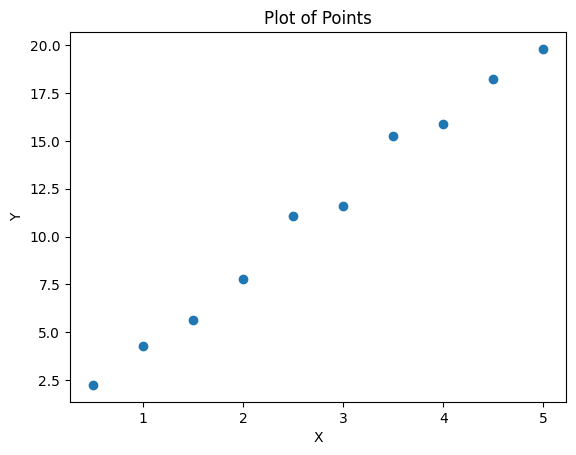

In [18]:
import matplotlib.pyplot as plt

# Scatter plot for points
plt.scatter(X, Y)

# Labels
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Points')

# Show the plot
plt.show()

## Find Mean Squared Error

Function to calculate mean squared error of n-points (x, y).

In [20]:
def MSE(m, b, X, Y):
  """
  mse = 1/n Σ(y' - y)^2
  """

  mse = 0
  for point in zip(X, Y):
    x, y = point
    e = y - line(m, b, x)
    mse += e**2

  # mse = mse/n
  return mse

# initialise
MSE(m=1, b=1, X=X, Y=Y)/len(X)

74.03838000000002

## Minimize MSE

Directly minimize MSE using partial derivatives.

In [21]:
"""
mse = 1/n * Σ(y' - (m * x + b))^2

∂e/∂m = 1/n * Σ 2 * (y' - (m * x + b)) (-x)
∂e/∂m = -2/n * Σx(y' - (m * x) - b))

∂e/∂b = 2/n * Σ(y' - (m * x + b)) (-1)
∂e/∂b = -2/n * Σ(y' - (m * x) - b))
"""

learning_rate = 0.01
iterations = 1000

# initialise m and b
m, b = 1,1

n = len(X)

for _ in range(iterations):
  # ∂e/∂m
  # =====
  # Z = Σx(y' - (m * x) - b))
  Z = 0
  for point in range(n):
    Z += (Y[point] - (m * X[point]) - b) * X[point]
  dedm = -2/n * Z

  # ∂e/∂b
  # =====
  # Z = Σ(y' - (m * x) - b))
  Z = 0
  for point in range(n):
    Z += Y[point] - (m * X[point]) - b
  dedb = -2/n * Z

  # adjust m & b based on learning rates
  m = m - learning_rate * dedm
  b = b - learning_rate * dedb

print(m, b)

3.987299157112894 0.222744931620763


## Visualise the fit

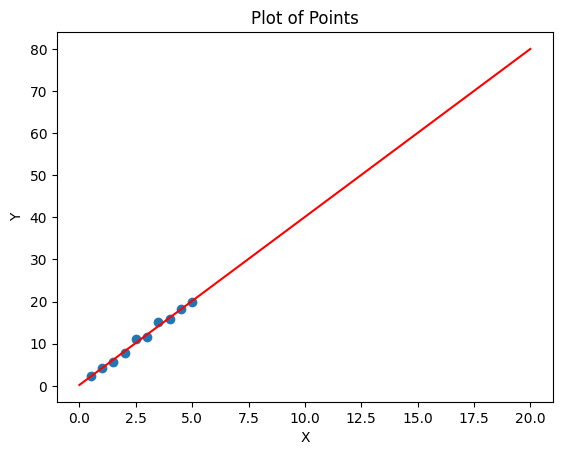

In [22]:
plt.scatter(X, Y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Points')

line_x = [0, 20]
line_y = [line(m, b, 0), line(m, b, 20)]
plt.plot(line_x, line_y, color='red')

plt.show()

In [23]:
# predict, amount_spent_on_ads = $4200
amount_spent_on_ads = 4200

revenue = line(m, b, amount_spent_on_ads * downscale_factor) / downscale_factor

# Profits
revenue - amount_spent_on_ads

12769.401391494921